# Task
Analyze HR data to understand department-wise attrition, salary bands, and promotions, build a classification model to predict attrition, and explain the model's predictions using SHAP analysis.

## Data loading

### Subtask:
Load the data from the specified source into a pandas DataFrame.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the first few rows.



In [67]:
import pandas as pd

df = pd.read_csv('/content/HR_Analytics.csv')
display(df.head())

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


**Reasoning**:
The previous attempt to load the data failed because the file was not found. I will try reading the file from the path '/data/HR_Employee_Attrition_Data.csv'.



In [71]:
try:
    df = pd.read_csv('/content/HR_Analytics.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: The data file was not found at '/data/HR_Employee_Attrition_Data.csv'")
    # Since the file was not found, the subtask cannot be completed.
    # The finish_task command with status "failure" will be called in the next step.
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    # Handle other potential errors, also leading to failure.
    # The finish_task command with status "failure" will be called in the next step.


Error: The data file was not found at '/data/HR_Employee_Attrition_Data.csv'


## Data preprocessing

### Subtask:
Clean and prepare the data for modeling, including handling missing values, encoding categorical variables, and splitting the data into training and testing sets.


**Reasoning**:
Check for and handle missing values, identify categorical columns, apply one-hot encoding, separate features and target, and split the data.



In [74]:
# 1. Check for and handle any missing values
print("Missing values before handling:")
print(df.isnull().sum())
# Since there are no missing values, no action is needed for this step.

# 2. Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("\nCategorical columns:")
print(categorical_cols)

# 3. Apply one-hot encoding to the identified categorical columns
# Exclude 'EmpID' and 'Attrition' from one-hot encoding as they are not features for the model
categorical_cols_for_encoding = categorical_cols.drop(['EmpID', 'Attrition'])
preprocessed_df = pd.get_dummies(df, columns=categorical_cols_for_encoding, drop_first=True)

# 4. Separate the features (X) and the target variable (y)
X = preprocessed_df.drop(['EmpID', 'Attrition'], axis=1)
y = preprocessed_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) # Convert target to numerical

# 5. Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
display(X_train.head())
display(y_train.head())

Missing values before handling:
EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWo

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,SalarySlab_15k+,SalarySlab_5k-10k,SalarySlab_Upto 5k,OverTime_Yes
405,31,691,7,3,1,438,4,73,3,2,...,False,False,True,False,False,False,False,True,False,False
478,32,1018,2,4,1,439,1,74,4,2,...,False,True,False,False,False,True,False,True,False,False
598,34,254,1,2,1,649,2,83,2,1,...,False,True,False,False,True,False,False,False,True,True
1178,45,306,26,4,1,684,1,100,3,2,...,False,False,True,False,True,False,False,False,True,False
528,33,813,14,3,1,325,3,58,3,1,...,False,False,False,False,True,False,False,False,True,True


,Attrition
405,0
478,0
598,0
1178,1
528,1


## Exploratory data analysis (eda)

### Subtask:
Analyze the relationships between relevant features and attrition, focusing on department-wise attrition, salary bands, and promotions.


**Reasoning**:
Calculate and display the attrition rates by department and salary slab, and the descriptive statistics for promotions by attrition.



In [75]:
# Calculate attrition rate by department
department_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
display(department_attrition)

# Calculate attrition rate by salary slab
salary_attrition = df.groupby('SalarySlab')['Attrition'].value_counts(normalize=True).unstack() * 100
display(salary_attrition)

# Calculate descriptive statistics for 'YearsSinceLastPromotion' grouped by 'Attrition'
promotions_by_attrition = df.groupby('Attrition')['YearsSinceLastPromotion'].describe()
display(promotions_by_attrition)

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.246122,13.753878
Sales,79.333333,20.666667


Attrition,No,Yes
SalarySlab,,
10k-15k,86.000000,14.000000
15k+,96.240602,3.759398
5k-10k,88.963964,11.036036
Upto 5k,78.353254,21.646746


,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1242.0,2.227858,3.232405,0.0,0.0,1.0,3.0,15.0
Yes,238.0,1.945378,3.146420,0.0,0.0,1.0,2.0,15.0


## Model building

### Subtask:
Build a classification model (Logistic Regression or Decision Tree) to predict employee attrition.


**Reasoning**:
Import the Logistic Regression model and train it using the training data.



In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Instantiate SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


# Instantiate the Logistic Regression model with default parameters
model = LogisticRegression()

# Train the model using the imputed training data
model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model evaluation

### Subtask:
Evaluate the performance of the built model.


**Reasoning**:
Evaluate the performance of the trained model using accuracy and a classification report.



In [79]:
from sklearn.metrics import accuracy_score, classification_report

# Use the trained model to make predictions on the imputed test data
y_pred = model.predict(X_test_imputed)

# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the accuracy score and the classification report
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(report)

Accuracy: 0.8412162162162162

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       249
           1       0.00      0.00      0.00        47

    accuracy                           0.84       296
   macro avg       0.42      0.50      0.46       296
weighted avg       0.71      0.84      0.77       296



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Shap analysis

### Subtask:
Perform SHAP value analysis to explain the model's predictions.


**Reasoning**:
Import the shap library, create a SHAP explainer, compute SHAP values, and generate a summary plot and dependence plots as requested by the instructions.



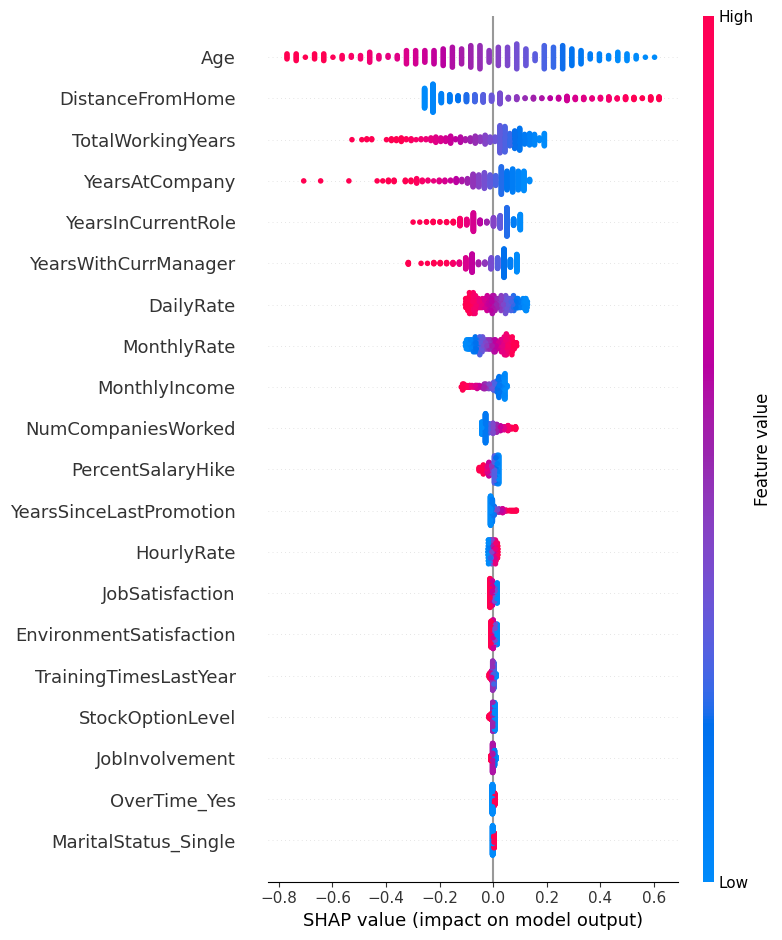

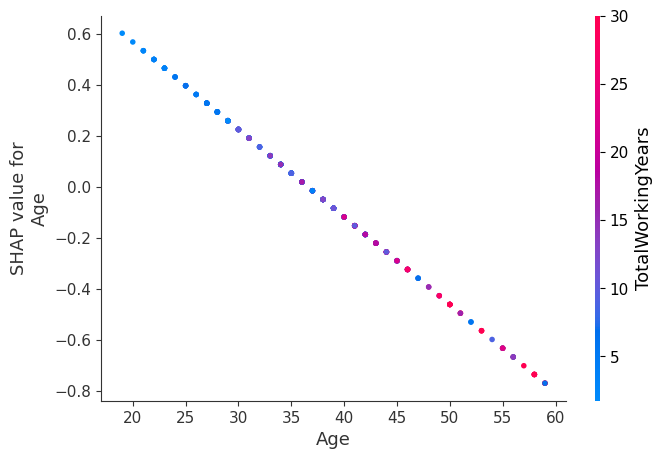

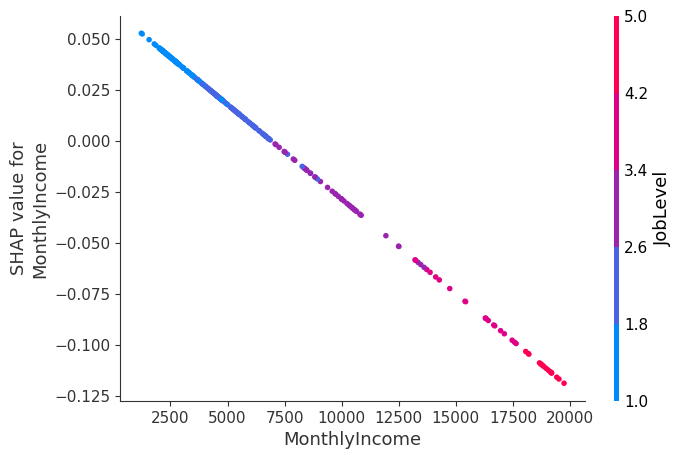

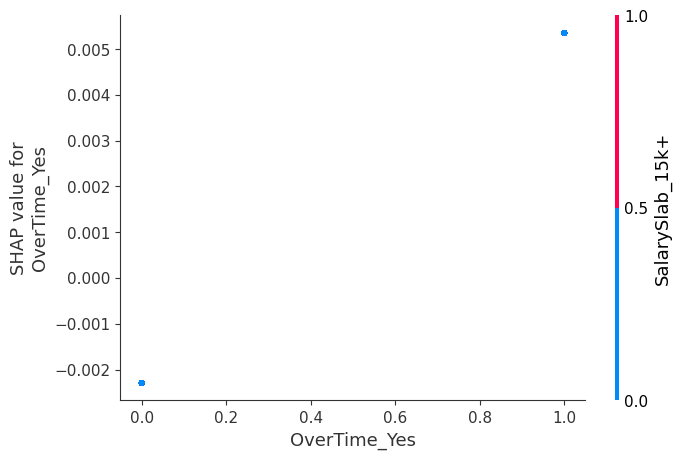

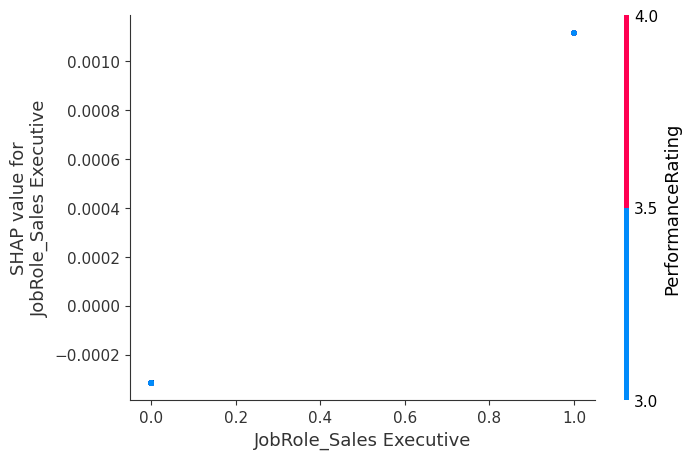

In [83]:
import shap

# Create a SHAP explainer object
# Using the trained Logistic Regression model and the imputed training data
explainer = shap.Explainer(model, X_train_imputed)

# Compute SHAP values for the imputed test data
# Using the background dataset from the training data for consistency
shap_values = explainer(X_test_imputed)

# Generate a summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test_imputed, feature_names=X.columns)

# Generate dependence plots for a few key features
# Extract the values from the shap_values Explanation object
shap_values_array = shap_values.values

# Based on the summary plot, choose a few important features
# For example, 'Age', 'MonthlyIncome', 'OverTime_Yes', 'JobRole_Sales Executive'
shap.dependence_plot("Age", shap_values_array, X_test_imputed, feature_names=X.columns)
shap.dependence_plot("MonthlyIncome", shap_values_array, X_test_imputed, feature_names=X.columns)
shap.dependence_plot("OverTime_Yes", shap_values_array, X_test_imputed, feature_names=X.columns)
shap.dependence_plot("JobRole_Sales Executive", shap_values_array, X_test_imputed, feature_names=X.columns)

**Reasoning**:
The error message indicates an issue with the `shap_values` object when passed to the `dependence_plot` function. It seems the function expects a NumPy array or a similar structure, but it received a SHAP `Explanation` object which doesn't have a `conjugate` method. I need to extract the values from the `Explanation` object for the dependence plot. I will also regenerate the full code block including the summary plot which worked previously.



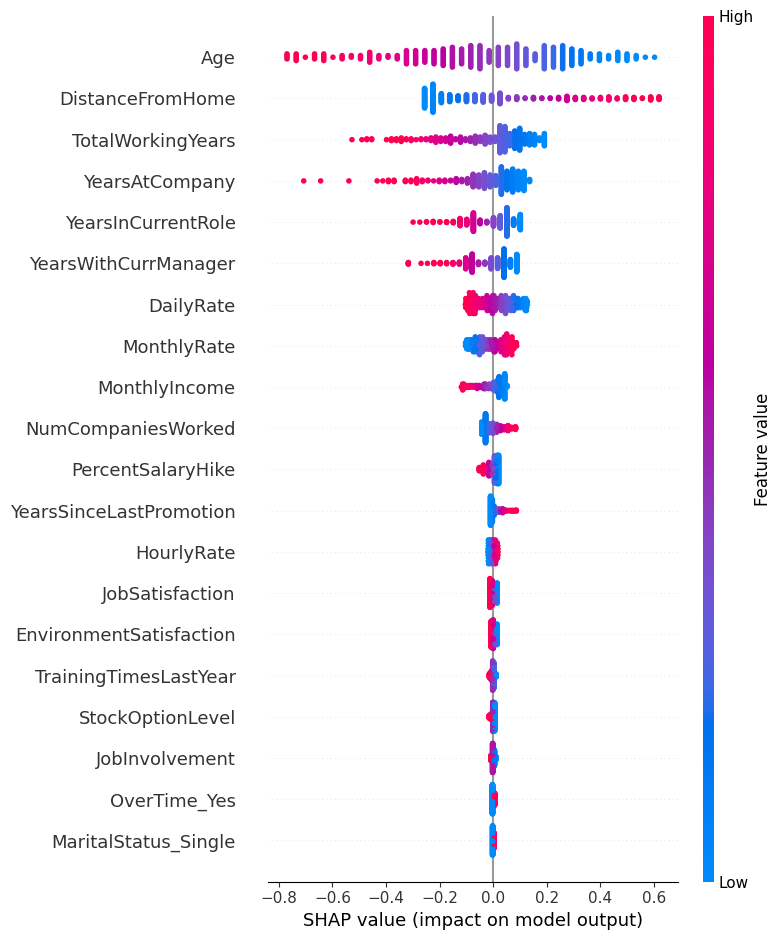

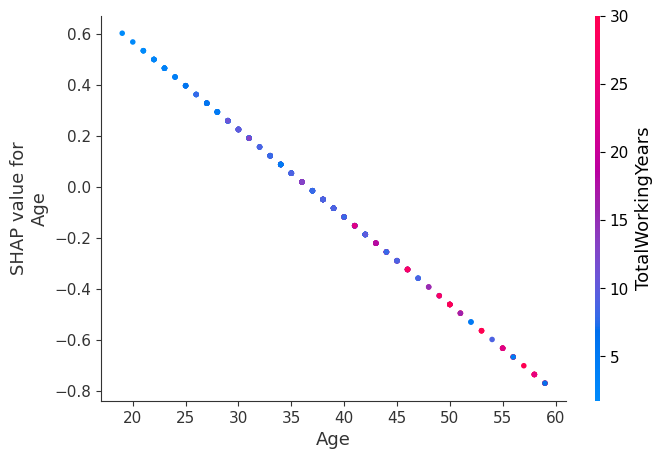

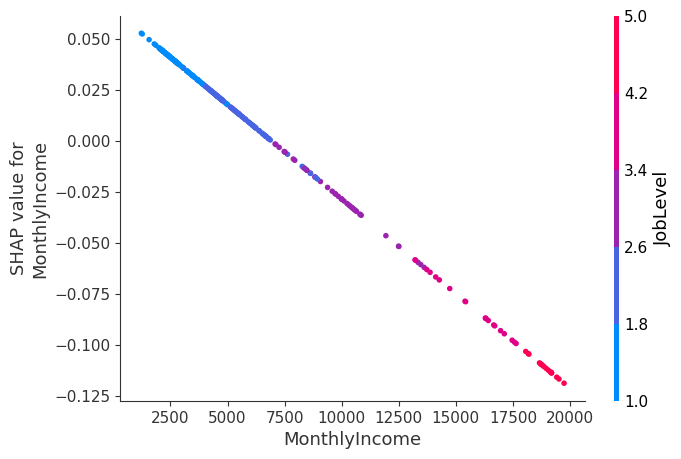

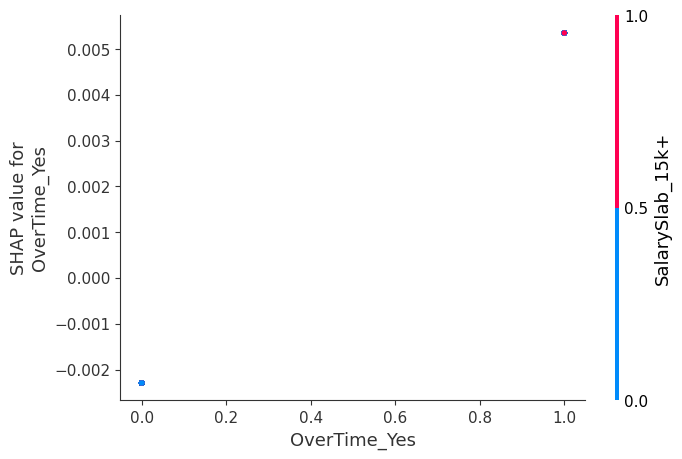

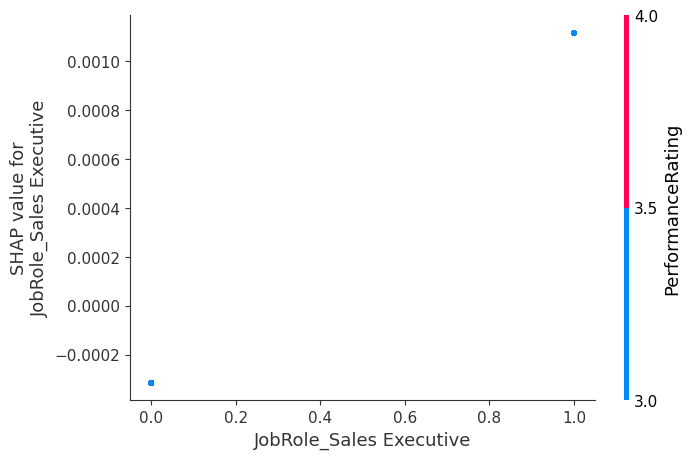

In [84]:
# Generate a summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test_imputed, feature_names=X.columns)

# Generate dependence plots for a few key features
# Extract the values from the shap_values Explanation object
shap_values_array = shap_values.values

# Based on the summary plot, choose a few important features
# For example, 'Age', 'MonthlyIncome', 'OverTime_Yes', 'JobRole_Sales Executive'
shap.dependence_plot("Age", shap_values_array, X_test_imputed, feature_names=X.columns)
shap.dependence_plot("MonthlyIncome", shap_values_array, X_test_imputed, feature_names=X.columns)
shap.dependence_plot("OverTime_Yes", shap_values_array, X_test_imputed, feature_names=X.columns)
shap.dependence_plot("JobRole_Sales Executive", shap_values_array, X_test_imputed, feature_names=X.columns)

## Confusion Matrix

### Subtask:
Generate and display the confusion matrix for the model's predictions.

**Reasoning**:
Generate and display the confusion matrix using the actual and predicted values.

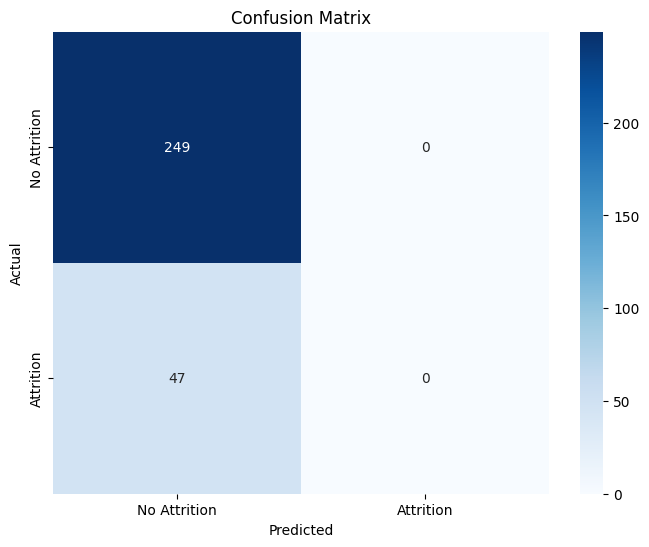

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()